In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import ttest_ind

In [2]:
# Use os.join.path so any OS can run this code
coal_path = os.path.join("..", "Cleaned Data", "coal_consumption.csv")
natural_gas_path = os.path.join("..", "Cleaned Data", "natural_gas_consumption.csv")
nuclear_path = os.path.join("..", "Cleaned Data", "nuclear_consumption.csv")
petroleum_path = os.path.join("..", "Cleaned Data", "petroleum_consumption.csv")
world_pop_path = os.path.join("..", "Cleaned Data", "world_population_clean.csv")
total_consumption = os.path.join("..", "Cleaned Data", "total_consumption.csv")
pop_density = os.path.join("..", "Cleaned Data", "population_density_clean.csv")
temp_change = os.path.join("..", "Cleaned Data", "Temperature_Delta_1986 to 2016.csv")

# Read the csv into a data frame and display the first few rows of one of the data frames
coal = pd.read_csv(coal_path)
natural_gas = pd.read_csv(natural_gas_path)
nuclear = pd.read_csv(nuclear_path)
petroleum = pd.read_csv(petroleum_path)
world = pd.read_csv(world_pop_path)
total = pd.read_csv(total_consumption)
pop_density_df = pd.read_csv(pop_density)
temperature = pd.read_csv(temp_change)
coal.head()

,total energy consumption from coal (quad Btu),1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,World,92.61898154,95.64405155,98.6790131,97.63128798,101.1496542,90.98777896,88.3269182,88.50403542,89.04034491,...,142.0802631,144.317679,144.7411719,154.1538668,163.4665458,169.5297013,172.9542668,172.2478228,168.4392041,165.8359358
1,Afghanistan,0.003333443,0.003479281,0.002875095,0.00264592,0.002187572,0.001958398,0.000166672,0.000145838,0.000125004,...,0.005062667,0.007229405,0.010417009,0.015104664,0.03083431,0.025834152,0.028063389,0.031613501,0.028438401,0.03537612
2,Albania,0.03566854,0.037287502,0.037487996,0.037114729,0.032372883,0.018421893,0.00523497,0.003465617,0.002812836,...,0.002359147,0.002858442,0.003923002,0.003524944,0.003311342,0.002968888,0.00264252,0.003339684,0.002822255,0.00219942
3,Algeria,0.041970513,0.045400039,0.045428177,0.041014686,0.028252183,0.031485003,0.029095597,0.022630099,0.022967504,...,0.015373496,0.01567704,0.003821761,7.96356E-05,5.65193E-05,0.00033495,0.001109634,0.001079212,0.000698246,0.000697224
4,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Define a function that takes in a data frame and returns the x and y values to plot
def plot(df, country):

    # Grab all the column names
    x = df.columns

    # Set the energy consumption type
    world_consumption = x[0]

    # Run a loop to get all the years into a list for the y axis
    years = [x[name] for name in range(1, len(x))]

    # Get the values for the data stored in the World row and create a list to use for plotting
    energy_consumption = df.loc[df[world_consumption] == country,"1986":"2016"].values.flatten().tolist()

    # Run a loop to round the values in the list
    energy_consumption = [round(float(value),2) for value in energy_consumption]

    # Return the lists to plot with
    return years, energy_consumption

In [4]:
# Call the function to get the values required to plot
coal_x, coal_y = plot(coal, "World")
natural_x, natural_y = plot(natural_gas, "World")
nuclear_x, nuclear_y = plot(nuclear, "World")
petroleum_x, petroleum_y = plot(petroleum, "World")
world_x, world_y = plot(world, "World")

# Since the world population file is slight different, remove the first column header
del world_x[0]

# Create a rounded list of values for world population to see differences on the plot
world_y = [round(value/1000000000,2) for value in world_y]

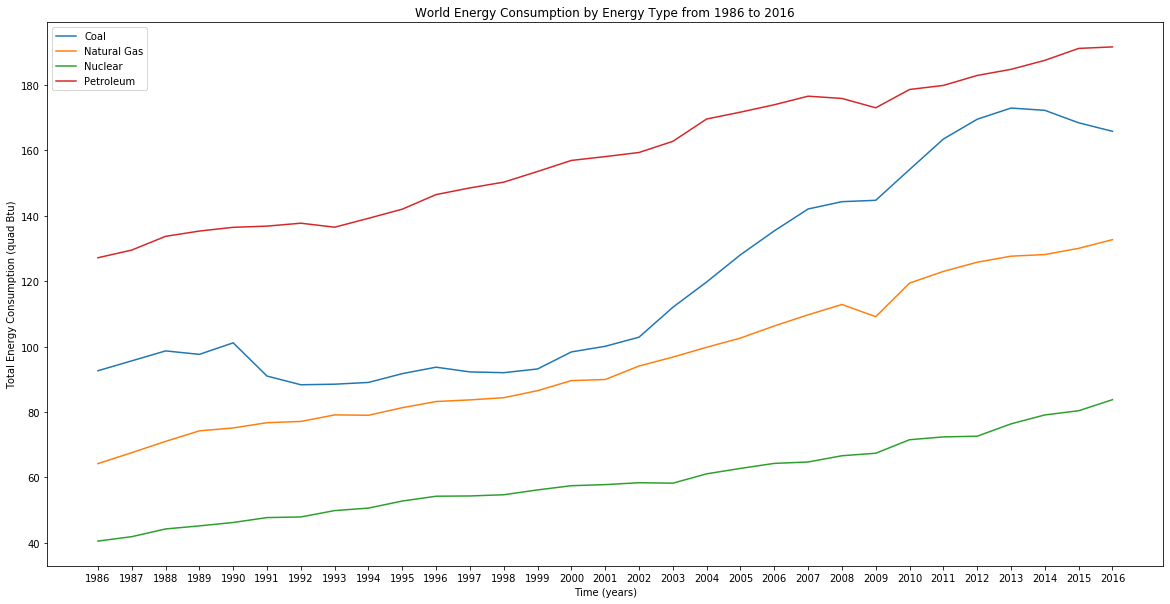

In [5]:
# Make adjustments for plot size, plot each line, add legend, add title and axis labels, etc
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(coal_x, coal_y)
ax1.plot(natural_x, natural_y)
ax1.plot(nuclear_x, nuclear_y)
ax1.plot(petroleum_x, petroleum_y)
ax1.set_ylabel("Total Energy Consumption (quad Btu)")
ax1.set_xlabel("Time (years)")
ax1.legend(labels=["Coal", "Natural Gas", "Nuclear", "Petroleum"], loc=2)

# Create a second plot over the first one for world population
# ax2 = ax1.twinx()
# ax2.plot(world_x, world_y, color="magenta")
# ax2.set_ylabel("World Population (billions)")
# ax2.legend(labels=["World Population"], loc=4)
plt.title("World Energy Consumption by Energy Type from 1986 to 2016");

# Save the image as a png
plt.savefig("../Images/World Energy Consumption by Energy Type.png")

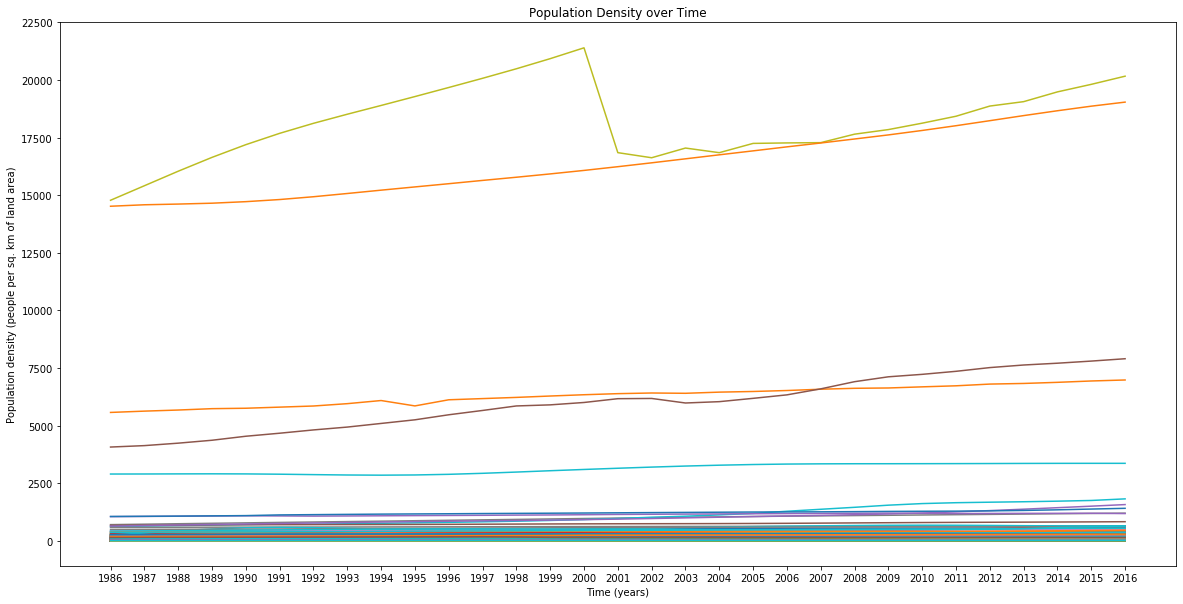

In [6]:
# Plot all of the data as a line plot showing years on the x-axis and change in population density on the y-axis
plt.figure(figsize=(20,10))
for country in pop_density_df["Country Name"]:
    pop_x, pop_y = plot(pop_density_df, country)
    del pop_x[0]
    plt.plot(pop_x, pop_y)
plt.yticks(np.arange(0, 25000, 2500))
#plt.grid(axis="x")
plt.ylabel("Population density (people per sq. km of land area)")
plt.xlabel("Time (years)")
plt.title("Population Density over Time");

In [7]:
# Since it appears as though most of the countries don't really change too much, let's look at the top 5 countries with the largest change

# Get a list of the column headers
x = pop_density_df.columns

# Create a new dataframe and set the columns
top_5 = pd.DataFrame(columns=x)

# Create a list of starting values from the first year in the data
starting_year = pop_density_df["1986"].tolist()

# Find the top 5 highest starting populations and store them in a data frame
for x in range(0,5):
    max_value = max(starting_year)
    top_5 = top_5.append(pop_density_df.loc[pop_density_df["1986"] == max_value])
    starting_year.remove(max_value)

# Find the top 5 lowest starting populations and store them in a data frame
for x in range(0,5):
    min_value = min(starting_year)
    top_5 = top_5.append(pop_density_df.loc[pop_density_df["1986"] == min_value])
    starting_year.remove(min_value)

# Display the data frame
top_5

,Country Name,Country Code,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
138,"Macao SAR, China",MAC,14779.550000,15409.000000,16038.650000,16639.150000,17190.400000,17681.300000,18115.550000,18509.950000,...,17277.773521,17645.170772,17844.067508,18121.851677,18422.474858,18864.180542,19055.181698,19478.812065,19805.427880,20159.079200
141,Monaco,MCO,14520.500000,14584.000000,14614.500000,14652.500000,14719.000000,14811.000000,14932.500000,15073.000000,...,17262.500000,17436.000000,17613.000000,17806.000000,18012.000000,18230.000000,18450.500000,18661.000000,18859.000000,19035.000000
91,"Hong Kong SAR, China",HKG,5580.404040,5636.868687,5684.444444,5743.636364,5762.121212,5810.101010,5859.090909,5960.606061,...,6586.952381,6626.476190,6640.761905,6689.714286,6734.857143,6809.619048,6837.047619,6885.238095,6944.095238,6987.238095
195,Singapore,SGP,4079.661194,4141.476119,4247.922388,4374.479104,4547.958209,4679.228358,4821.937313,4945.479104,...,6602.300719,6913.422857,7125.104286,7231.812280,7363.193022,7524.698463,7636.721687,7714.702232,7806.772752,7908.720563
79,Gibraltar,GIB,2909.400000,2911.500000,2915.900000,2918.700000,2914.700000,2902.200000,2884.000000,2867.500000,...,3351.700000,3355.900000,3356.500000,3358.500000,3361.200000,3364.600000,3369.200000,3372.500000,3373.600000,3373.700000
86,Greenland,GRL,0.156570,0.158326,0.160375,0.161838,0.162716,0.162423,0.161838,0.161545,...,0.137788,0.137235,0.137223,0.138641,0.138604,0.138409,0.137612,0.137154,0.136713,0.136889
154,Mongolia,MNG,1.272117,1.308829,1.345114,1.378132,1.405897,1.427635,1.444099,1.456774,...,1.669598,1.694108,1.721077,1.750751,1.783235,1.818210,1.854960,1.892497,1.930044,1.967326
161,Namibia,NAM,1.506065,1.562994,1.623409,1.683502,1.740462,1.793278,1.842556,1.888886,...,2.437190,2.481986,2.527717,2.573667,2.619613,2.665870,2.712908,2.761396,2.811772,2.864168
156,Mauritania,MRT,1.775177,1.823773,1.872934,1.922867,1.973752,2.025722,2.078825,2.133047,...,3.107128,3.198058,3.292334,3.390118,3.491460,3.596152,3.703788,3.813812,3.925780,4.039521
30,Botswana,BWA,1.960269,2.037842,2.117529,2.195903,2.270492,2.340307,2.406003,2.468742,...,3.309264,3.380162,3.446964,3.506264,3.556194,3.598805,3.639363,3.685378,3.742022,3.811240


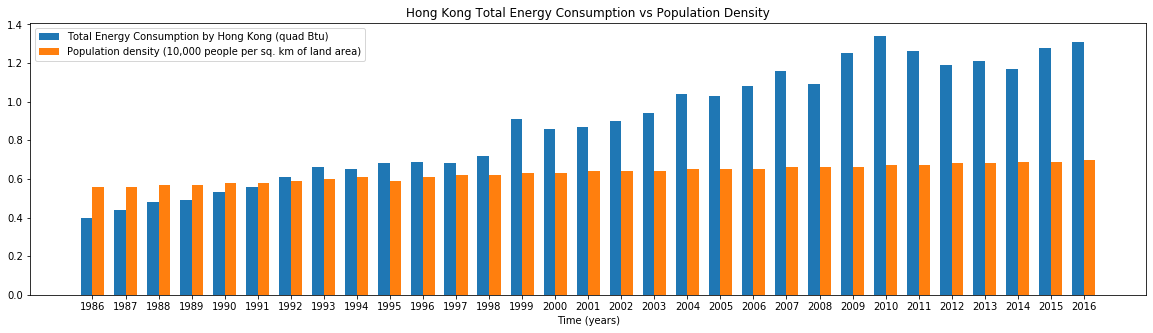

In [8]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Hong Kong")
pop_density_x, pop_density_y = plot(pop_density_df, "Hong Kong SAR, China")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
pop_density_y = [round(value/10000,2) for value in pop_density_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,5))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Hong Kong (quad Btu)')
rects2 = ax.bar(x + width/2, pop_density_y, width, label="Population density (10,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Hong Kong Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Save the image as a png
#plt.savefig("../Images/Hong Kong Total Energy Consumption vs Population Density.png")

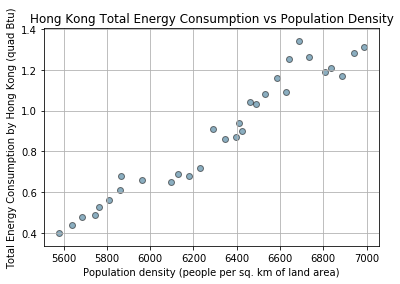

In [9]:
# Create a scatter plot for the data
total_x, total_y = plot(total, "Hong Kong")
pop_density_x, pop_density_y = plot(pop_density_df, "Hong Kong SAR, China")
plt.scatter(pop_density_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Hong Kong Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by Hong Kong (quad Btu)")
plt.grid()

The correlation between both factors is 0.97


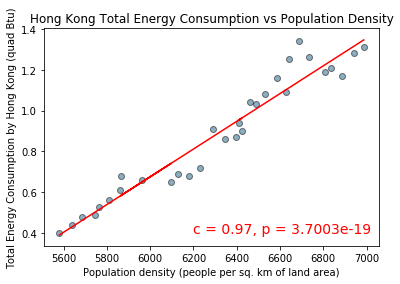

In [10]:
# Create a linear regression to find the correlation
x_values = np.array(pop_density_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Hong Kong Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by Hong Kong (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(6200,0.4),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the image as a png
#plt.savefig("../Images/Hong Kong Total Energy Consumption vs Population Density Regression.png", dpi=100)

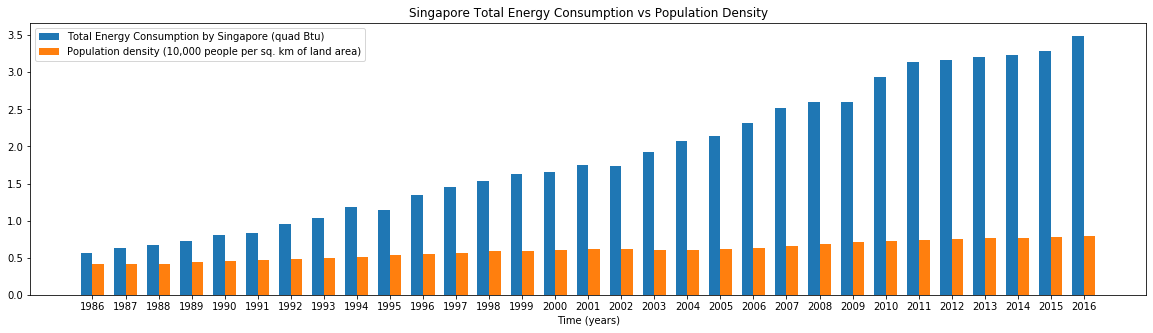

In [11]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Singapore")
top_5_x, top_5_y = plot(pop_density_df, "Singapore")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,5))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Singapore (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Singapore Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Save the image as a png
plt.savefig("../Images/Singapore Total Energy Consumption vs Population Density.png")

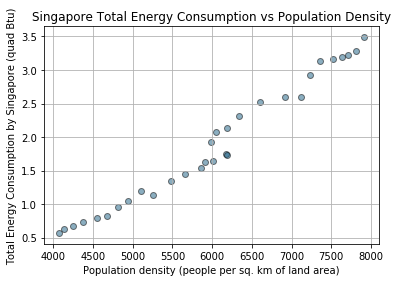

In [12]:
# Create a scatter plot for the data
total_x, total_y = plot(total, "Singapore")
pop_density_x, pop_density_y = plot(pop_density_df, "Singapore")
plt.scatter(pop_density_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Singapore Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by Singapore (quad Btu)")
plt.grid()

The correlation between both factors is 0.99


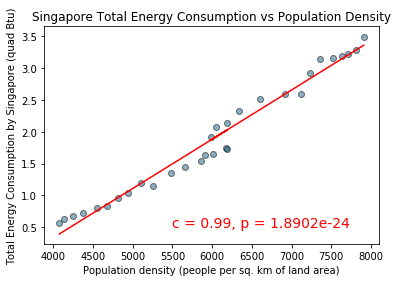

In [13]:
# Create a linear regression to find the correlation
x_values = np.array(pop_density_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Singapore Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by Singapore (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(5500,0.5),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the image as a png
plt.savefig("../Images/Singapore Total Energy Consumption vs Population Density Regression.png", dpi=100)

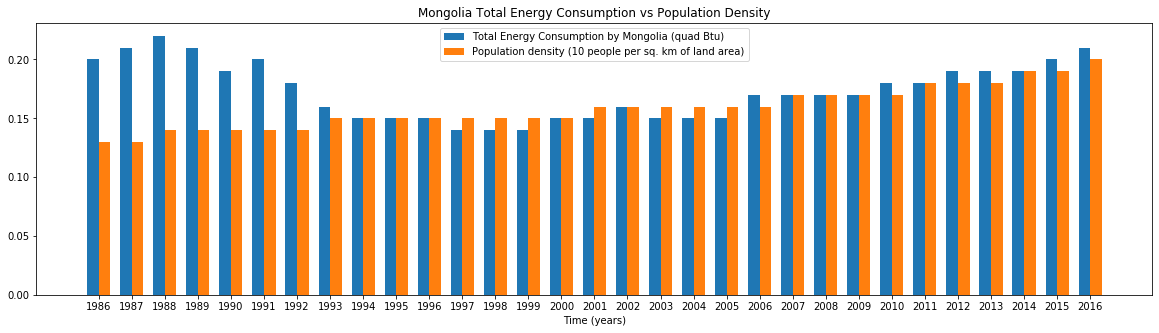

In [14]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Mongolia")
top_5_x, top_5_y = plot(pop_density_df, "Mongolia")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,5))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Mongolia (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Mongolia Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Save the image as a png
#plt.savefig("../Images/Mongolia Total Energy Consumption vs Population Density.png")

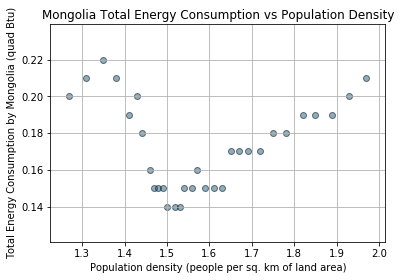

In [15]:
# Create a scatter plot for the data
total_x, total_y = plot(total, "Mongolia")
pop_density_x, pop_density_y = plot(pop_density_df, "Mongolia")
plt.scatter(pop_density_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Mongolia Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by Mongolia (quad Btu)")
plt.grid()

The correlation between both factors is 0.07


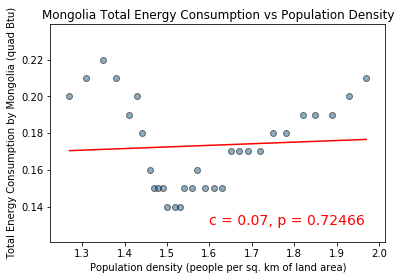

In [16]:
# Create a linear regression to find the correlation
x_values = np.array(pop_density_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Mongolia Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by Mongolia (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(1.6,0.13),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the image as a png
#plt.savefig("../Images/Mongolia Total Energy Consumption vs Population Density Regression.png", dpi=100)

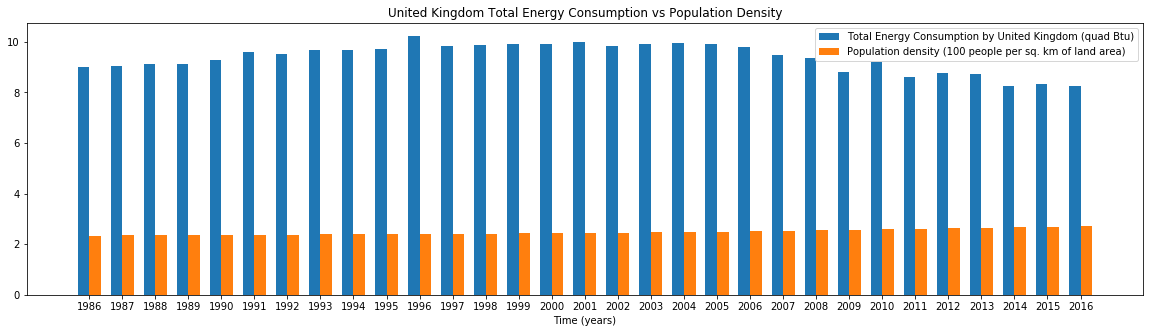

In [17]:
# Find total consumption and population density data
total_x, total_y = plot(total, "United Kingdom")
top_5_x, top_5_y = plot(pop_density_df, "United Kingdom")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/100,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,5))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by United Kingdom (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (100 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('United Kingdom Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Save the image as a png
plt.savefig("../Images/United Kingdom Total Energy Consumption vs Population Density.png")

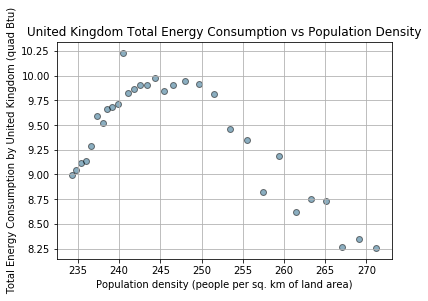

In [18]:
# Create a scatter plot for the data
total_x, total_y = plot(total, "United Kingdom")
pop_density_x, pop_density_y = plot(pop_density_df, "United Kingdom")
plt.scatter(pop_density_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("United Kingdom Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by United Kingdom (quad Btu)")
plt.grid()

The correlation between both factors is -0.64


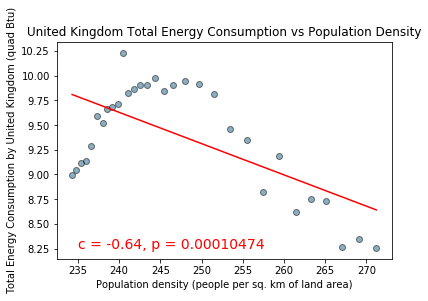

In [19]:
# Create a linear regression to find the correlation
x_values = np.array(pop_density_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("United Kingdom Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by United Kingdom (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(235,8.25),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/United Kingdom Total Energy Consumption vs Population Density Regression.png", dpi=100)

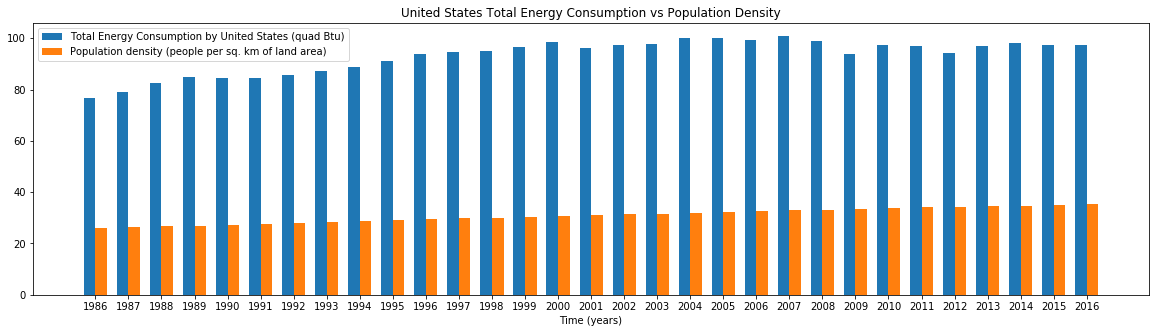

In [20]:
# Find total consumption and population density data
total_x, total_y = plot(total, "United States")
top_5_x, top_5_y = plot(pop_density_df, "United States")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
#top_5_y = [round(value/10,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,5))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by United States (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('United States Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=2);

# Save the image as a png
plt.savefig("../Images/United States Total Energy Consumption vs Population Density.png")

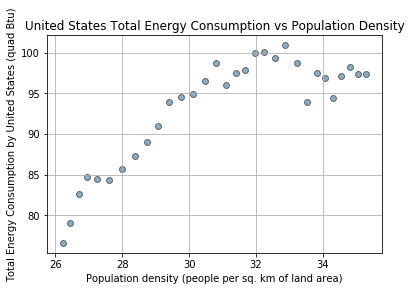

In [21]:
# Create a scatter plot for the data
total_x, total_y = plot(total, "United States")
pop_density_x, pop_density_y = plot(pop_density_df, "United States")
plt.scatter(pop_density_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("United States Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by United States (quad Btu)")
plt.grid()

The correlation between both factors is 0.84


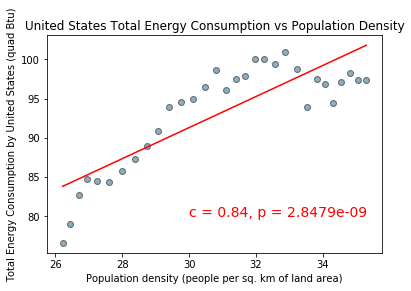

In [22]:
# Create a linear regression to find the correlation
x_values = np.array(pop_density_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("United States Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by United States (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(30,80),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/United States Total Energy Consumption vs Population Density Regression.png", dpi=100)

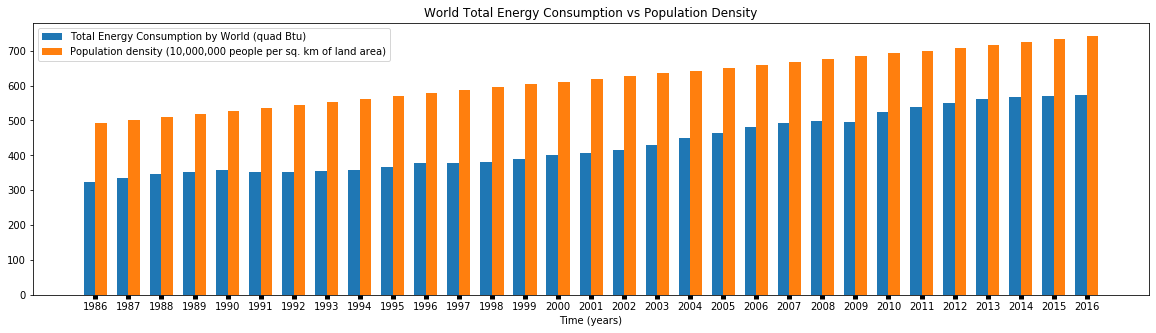

In [23]:
# Find total consumption and population density data
total_x, total_y = plot(total, "World")
top_5_x, top_5_y = plot(world, "World")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,5))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by World (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('World Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

ax.tick_params(axis='x', which='major', width=5)
# Save the image as a png
plt.savefig("../Images/World Total Energy Consumption vs Population Density.png")

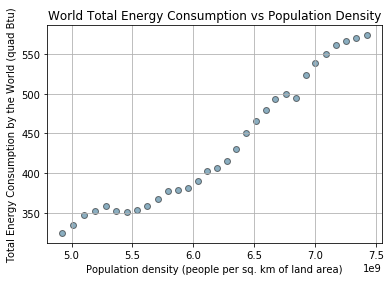

In [24]:
# Create a scatter plot for the data
total_x, total_y = plot(total, "World")
pop_density_x, pop_density_y = plot(world, "World")
plt.scatter(pop_density_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("World Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by the World (quad Btu)")
plt.grid()

The correlation between both factors is 0.97


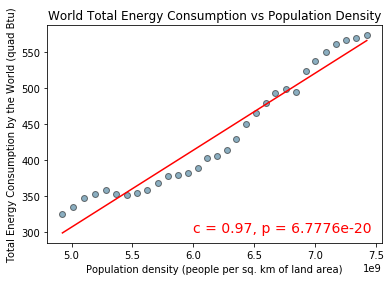

In [25]:
x_values = np.array(pop_density_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("World Total Energy Consumption vs Population Density")
plt.xlabel("Population density (people per sq. km of land area)")
plt.ylabel("Total Energy Consumption by the World (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(6000000000,300),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/World Total Energy Consumption vs Population Density Regression.png", dpi=100)

In [26]:
gcag = temperature.loc[temperature["Source"] == "GCAG", "Year": "Mean"]
gcag_clean = gcag.loc[gcag["Year"] > 1985].sort_values(by="Year")
gcag_clean = gcag_clean["Mean"].values.flatten().tolist()

In [27]:
gistemp = temperature.loc[temperature["Source"] == "GISTEMP", "Year": "Mean"]
gistemp_clean = gistemp.loc[gistemp["Year"] > 1985].sort_values(by="Year")
gistemp_clean = gistemp_clean["Mean"].values.flatten().tolist()


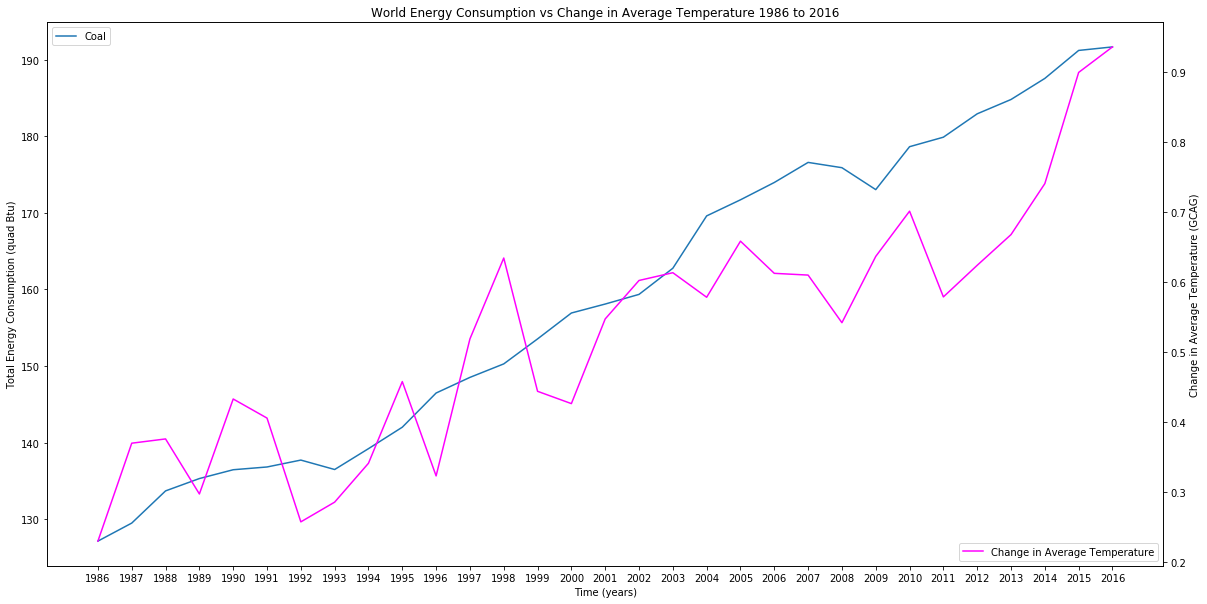

In [28]:
# Make adjustments for plot size, plot each line, add legend, add title and axis labels, etc
fig, ax1 = plt.subplots(figsize=(20,10))
#ax1.plot(coal_x, coal_y)
#ax1.plot(natural_x, natural_y)
#ax1.plot(nuclear_x, nuclear_y)
ax1.plot(petroleum_x, petroleum_y)
ax1.set_ylabel("Total Energy Consumption (quad Btu)")
ax1.set_xlabel("Time (years)")
ax1.legend(labels=["Coal", "Natural Gas", "Nuclear", "Petroleum"], loc=2)

# Create a second plot over the first one
ax2 = ax1.twinx()
ax2.plot(coal_x, gcag_clean, color="magenta")
ax2.set_ylabel("Change in Average Temperature (GCAG)")
ax2.legend(labels=["Change in Average Temperature"], loc=4)
plt.title("World Energy Consumption vs Change in Average Temperature 1986 to 2016");

# Save the image as a png
#plt.savefig("../Images/World Energy Consumption by Energy Type.png")

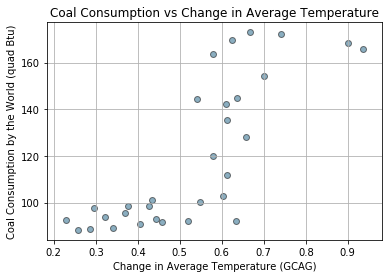

In [29]:
# Create a scatter plot for the data
plt.scatter(gcag_clean , coal_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Coal Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Coal Consumption by the World (quad Btu)")
plt.grid()

The correlation between both factors is 0.79


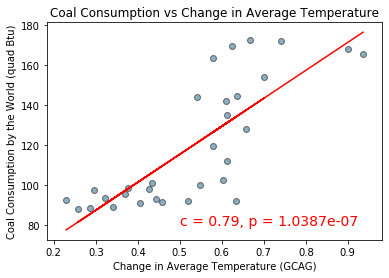

In [30]:
x_values = np.array(gcag_clean)
y_values = np.array(coal_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Coal Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Coal Consumption by the World (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(0.5,80),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/Coal Consumption vs Change in Average Temperature Regression.png", dpi=100)

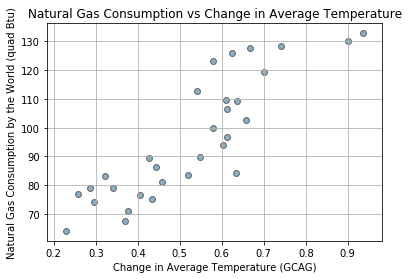

In [31]:
plt.scatter(gcag_clean , natural_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Natural Gas Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Natural Gas Consumption by the World (quad Btu)")
plt.grid()

The correlation between both factors is 0.87


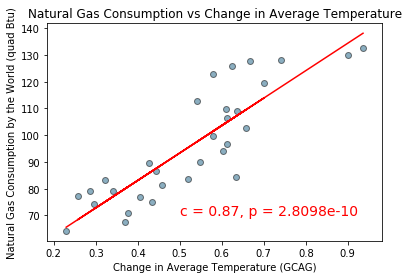

In [38]:
x_values = np.array(gcag_clean)
y_values = np.array(natural_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Natural Gas Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Natural Gas Consumption by the World (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(0.5,70),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/Natural Gas Consumption vs Change in Average Temperature Regression.png", dpi=100)

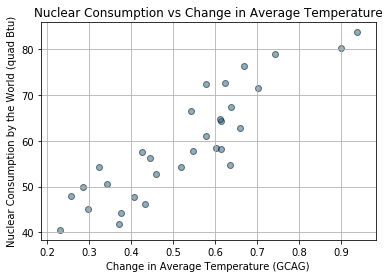

In [33]:
plt.scatter(gcag_clean , nuclear_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Nuclear Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Nuclear Consumption by the World (quad Btu)")
plt.grid()

The correlation between both factors is 0.89


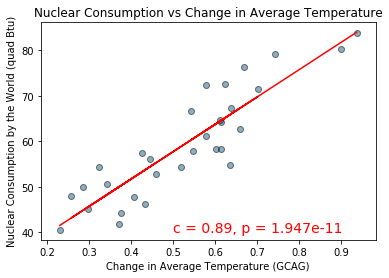

In [34]:
x_values = np.array(gcag_clean)
y_values = np.array(nuclear_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Nuclear Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Nuclear Consumption by the World (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(0.5,40),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/Nuclear Consumption vs Change in Average Temperature Regression.png", dpi=100)

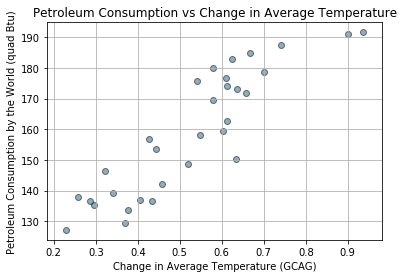

In [35]:
plt.scatter(gcag_clean , petroleum_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Petroleum Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Petroleum Consumption by the World (quad Btu)")
plt.grid()

The correlation between both factors is 0.89


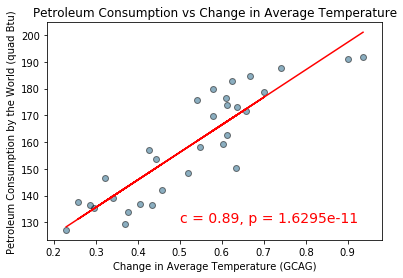

In [36]:
x_values = np.array(gcag_clean)
y_values = np.array(petroleum_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.title("Petroleum Consumption vs Change in Average Temperature")
plt.xlabel("Change in Average Temperature (GCAG)")
plt.ylabel("Petroleum Consumption by the World (quad Btu)")
correlation = st.pearsonr(x_values, y_values)
r = f"c = {round(correlation[0],2)}, p = {pvalue:.5}"
plt.annotate(r,(0.5,130),fontsize=14,color="red");
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the image as a png
plt.savefig("../Images/Petroleum Consumption vs Change in Average Temperature Regression.png", dpi=100)

In [37]:
# Conduct a Independent T-Test (Two Sample) with a p-value of .01
# Null Hypothesis (H0): Both petroleum consumption and natural gas consumption affect the change in temperature by the same amount
# Alternative Hypothesis (HA): Petroleum and natural gas consumption have different effects on the change in temperature
st.ttest_ind(petroleum_y, natural_y, equal_var=False)

# We can reject the null hypothesis and say that petroleum and natural gas have different effects on the change in temperature.

Ttest_indResult(statistic=12.02341423145708, pvalue=1.2814967443190459e-17)